<a href="https://colab.research.google.com/github/F1owly/EmotionDetector/blob/main/ResNet101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import cv2
import numpy as np  # для работы с математикой
import matplotlib.pyplot as plt  # для вывода картинки
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input,
    Activation,
    Dense,
    Flatten
)
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D
)
from tensorflow.keras.layers import add
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

from keras.applications import ResNet50

In [ ]:
#!unzip '/content/drive/MyDrive/train_moderaciya_kartocek_tovarov.zip' ;

In [3]:
width, height = [224, 224]


#Загрузка изображений

In [ ]:
dir_name = '/content/train'

In [ ]:
X_cigs = []
for filename in os.listdir(dir_name + '/cigs'):
    img_path = os.path.join(dir_name + '/cigs', filename)
    image = cv2.imread(img_path)

    image = cv2.resize(image, (width, height))
    X_cigs.append(image)

X_cigs = np.array(X_cigs)

In [ ]:
X_other = []
for filename in os.listdir(dir_name + '/other'):
    img_path = os.path.join(dir_name + '/other', filename)
    image = cv2.imread(img_path)

    image = cv2.resize(image, (width, height))
    X_other.append(image)

X_other =  np.array(X_other)

In [ ]:
X_pipes = []
for filename in os.listdir(dir_name + '/pipes'):
    img_path = os.path.join(dir_name + '/pipes', filename)
    image = cv2.imread(img_path)

    image = cv2.resize(image, (width, height))
    X_pipes.append(image)

X_pipes = np.array(X_pipes)

In [ ]:
X_roll_cigs = []
for filename in os.listdir(dir_name + '/roll_cigs'):
    img_path = os.path.join(dir_name + '/roll_cigs', filename)
    image = cv2.imread(img_path)

    image = cv2.resize(image, (width, height))
    X_roll_cigs.append(image)

X_roll_cigs = np.array(X_roll_cigs)

In [ ]:
X_smoking = []
for filename in os.listdir(dir_name + '/smoking'):
    img_path = os.path.join(dir_name + '/smoking', filename)
    image = cv2.imread(img_path)

    image = cv2.resize(image, (width, height))
    X_smoking.append(image)

X_smoking = np.array(X_smoking)

#Подготовка данных для многоклассовой класссификации



In [ ]:
y_cigs = X_cigs.shape[0]*[[0, 1, 0, 0, 0]]
y_pipes = X_pipes.shape[0]*[[0, 0, 1, 0, 0]]
y_roll_cigs = X_roll_cigs.shape[0]*[[0, 0, 0, 1, 0]]
y_smoking = X_smoking.shape[0]*[[0, 0, 0, 0, 1]]
y_other = X_other.shape[0]*[[1, 0, 0, 0, 0]]

In [ ]:
X = np.concatenate([X_cigs, X_pipes, X_roll_cigs, X_smoking, X_other])
y = np.concatenate([y_cigs, y_pipes, y_roll_cigs, y_smoking, y_other])

##Сохранение подготовленных датасетов для мультиклассовой классификации

In [ ]:
np.save('/content/drive/MyDrive/Hahaton/X_multyclass.npy', X)
np.save('/content/drive/MyDrive/Hahaton/y_multyclass.npy', y)

#Создание нейросети для мультиклассовой классификации

#Загрузка датасета

In [4]:
X = np.load('/content/drive/MyDrive/Hahaton/X_multyclass.npy')
y = np.load('/content/drive/MyDrive/Hahaton/y_multyclass.npy')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
input_shape = (width, height, 3)
num_outputs = 5

In [ ]:
model_resnet_50 = ResNet50(include_top = False, input_shape=input_shape)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([model_resnet_50,
Flatten(),
Dense(1024, activation='relu'),
Dense(5, activation='softmax')])

In [ ]:
model_resnet_50.trainable = False

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["f1_score"])

Epoch 1/2
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 292ms/step - f1_score: 0.4827 - loss: 76.7029 - val_f1_score: 0.6008 - val_loss: 5.5620
Epoch 2/2
83/83 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - f1_score: 0.8580 - loss: 1.4215 - val_f1_score: 0.7195 - val_loss: 2.1342


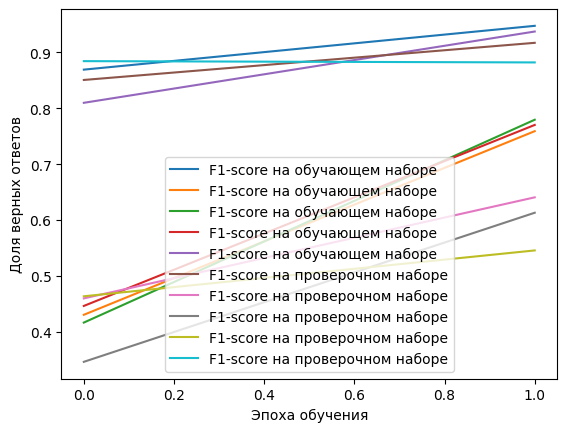

In [ ]:
batch_size = 64
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=2,
                    validation_data=(X_test, y_test),
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['f1_score'],
         label='F1-score на обучающем наборе')
plt.plot(history.history['val_f1_score'],
         label='F1-score на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Hahaton/resnet50_multyclass_model2.h5")

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=1,
                    validation_data=(X_test, y_test),
                    verbose=1)

83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 239ms/step - f1_score: 0.9591 - loss: 0.1630 - val_f1_score: 0.8042 - val_loss: 1.9611


In [ ]:
y_pred = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


In [ ]:
def f1_bin(y_true, y_pred):
  max_indices = np.argmax(y_pred, axis=1)
  result_array = np.zeros_like(y_pred)
  result_array[np.arange(y_pred.shape[0]), max_indices] = 1
  return f1_score(y_test, result_array, average=None)[0]

In [ ]:
f1_bin(y_test, y_pred)

0.9284064665127021

In [ ]:
model.save("/content/drive/MyDrive/Hahaton/resnet50_multyclass_model2+3epoch.h5")

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=1,
                    validation_data=(X_test, y_test),
                    verbose=1)

y_pred = model.predict(X_test)
f1_bin(y_test, y_pred)

83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 241ms/step - f1_score: 0.9913 - loss: 0.0355 - val_f1_score: 0.7851 - val_loss: 2.7020
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


0.9302045728038508

In [ ]:
model.save("/content/drive/MyDrive/Hahaton/resnet50_multyclass_model2+3+4epoch.h5")

как ни пародоксально, но у мультиклассовой классификации после переобучения в смысле mc f1-score вырос local f1-score на 0.3 пункта

#Создание нейросети для бинарной классификации

In [14]:
X = np.load('/content/drive/MyDrive/Hahaton/X_multyclass.npy')
y = np.load('/content/drive/MyDrive/Hahaton/y_multyclass.npy')

In [15]:
y = y.flatten()[::5]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

##Собственно, сама сеть

In [25]:
input_shape = (width, height, 3)
num_outputs = 1

In [46]:
model_resnet_50 = ResNet50(include_top = False, input_shape=input_shape)

In [47]:
model = Sequential([model_resnet_50,
Flatten(),
Dense(1024, activation='relu'),
Dense(1, activation='sigmoid')])

In [48]:
model_resnet_50.trainable = False

In [49]:
model.compile(loss="binary_crossentropy", metrics=["acc"])

Epoch 1/2
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 320ms/step - acc: 0.7430 - loss: 52.9359 - val_acc: 0.8993 - val_loss: 0.2904
Epoch 2/2
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 216ms/step - acc: 0.9331 - loss: 0.1954 - val_acc: 0.8963 - val_loss: 0.3071


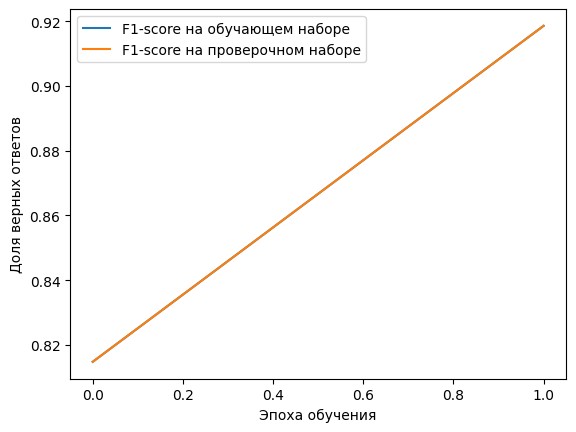

In [50]:
batch_size = 64
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=2,
                    validation_data=(X_test, y_test),
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['acc'],
         label='F1-score на обучающем наборе')
plt.plot(history.history['acc'],
         label='F1-score на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [51]:
y_pred = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step


In [53]:
P = 0.5
y_pred = np.where(y_pred > P, 1, 0)

In [54]:
f1_score(y_test, y_pred)

0.9230769230769231

In [55]:
model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=2,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/2
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 231ms/step - acc: 0.9638 - loss: 0.0950 - val_acc: 0.9001 - val_loss: 0.3268
Epoch 2/2
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - acc: 0.9847 - loss: 0.0583 - val_acc: 0.9092 - val_loss: 0.3765


In [73]:
def f1_(y_true, model, X_test):
  y_pred = model.predict(X_test)
  P = 0.2
  y_pred = np.where(y_pred > P, 1, 0)
  return f1_score(y_test, y_pred)

In [74]:
f1_(y_test, model, X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


0.9333333333333333

In [75]:
model.save("/content/drive/MyDrive/Hahaton/resnet50_binary_model4epoch.h5")